In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
# Font settings
plt.rcParams['font.size'] = 12                # Default font size for text
plt.rcParams['font.family'] = 'serif'         # Font family for text

# Figure settings
plt.rcParams['figure.figsize'] = (8, 6)       # Default figure size (width, height in inches)
plt.rcParams['figure.dpi'] = 100              # Resolution of the figure in dots per inch

# Axes settings
plt.rcParams['axes.grid'] = True              # Turn on/off gridlines by default
plt.rcParams['axes.titlesize'] = 20           # Font size of the plot titles
plt.rcParams['axes.labelsize'] = 16           # Font size of the x and y labels
plt.rcParams['axes.linewidth'] = 1.5          # Line width of the axes

# Tick settings
plt.rcParams['xtick.labelsize'] = 12          # Font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12          # Font size for y-axis tick labels
plt.rcParams['xtick.major.size'] = 6          # Size of major ticks on x-axis
plt.rcParams['ytick.major.size'] = 6          # Size of major ticks on y-axis

# Line settings
plt.rcParams['lines.linewidth'] = 2.0         # Line width for plot lines
plt.rcParams['lines.markersize'] = 6          # Marker size for plot markers

# Legend settings
plt.rcParams['legend.fontsize'] = 12          # Font size for legend text
plt.rcParams['legend.loc'] = 'best'           # Default location for legends

# Save settings
plt.rcParams['savefig.dpi'] = 300             # DPI for saved figures
plt.rcParams['savefig.bbox'] = 'tight'        # Adjust layout when saving figures

# Grid settings
plt.rcParams['grid.color'] = 'gray'           # Color of gridlines
plt.rcParams['grid.linestyle'] = '--'         # Line style for gridlines
plt.rcParams['grid.linewidth'] = 0.5          # Line width for gridlines
# import seaborn as sns
from scipy import stats

--- 
## Finetuning 200

Open tensorboard and download the record csv

In [2]:
# get val_loss and epoch dataframes for finetune 
fine_epochdf = pd.read_csv("model_logs/finetune_200/finetune_metrics.csv")
fine_epochdf.head(10)

,train_loss,train_loss_fape_final,train_loss_angle_final,train_loss_bond_final,train_loss_clash_final,train_loss_torsion_angle_final,epoch,step,val_loss,val_loss_fape_final,val_loss_angle_final,val_loss_bond_final,val_loss_clash_final,val_loss_torsion_angle_final,test_loss,test_loss_fape_final,test_loss_angle_final,test_loss_bond_final,test_loss_clash_final,test_loss_torsion_angle_final
0,0.683930,0.545294,0.018604,0.019213,0.016900,0.0,29,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,29,59,0.627969,0.542020,0.012556,0.012444,0.015219,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,30,61,0.624690,0.538851,0.012998,0.012746,0.015369,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,31,63,0.624143,0.539148,0.012327,0.012159,0.015430,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.656688,0.541206,0.015760,0.016010,0.016384,0.0,32,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,32,65,0.623306,0.538935,0.012226,0.012228,0.015442,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,33,67,0.623649,0.539100,0.011837,0.011821,0.015395,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,0.667391,0.539950,0.016195,0.016596,0.016328,0.0,34,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,34,69,0.618175,0.534667,0.011934,0.011784,0.015187,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,35,71,0.617982,0.534702,0.011275,0.011167,0.015119,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# augment the dataframe to align results
fine_valdf = fine_epochdf.drop(fine_epochdf[pd.isna(fine_epochdf.val_loss)].index)
fine_valdf.head()

,train_loss,train_loss_fape_final,train_loss_angle_final,train_loss_bond_final,train_loss_clash_final,train_loss_torsion_angle_final,epoch,step,val_loss,val_loss_fape_final,val_loss_angle_final,val_loss_bond_final,val_loss_clash_final,val_loss_torsion_angle_final,test_loss,test_loss_fape_final,test_loss_angle_final,test_loss_bond_final,test_loss_clash_final,test_loss_torsion_angle_final
1,NaN,NaN,NaN,NaN,NaN,NaN,29,59,0.627969,0.542020,0.012556,0.012444,0.015219,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,30,61,0.624690,0.538851,0.012998,0.012746,0.015369,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,31,63,0.624143,0.539148,0.012327,0.012159,0.015430,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,32,65,0.623306,0.538935,0.012226,0.012228,0.015442,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,33,67,0.623649,0.539100,0.011837,0.011821,0.015395,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# # get the total wall time 
# timedeltas = pd.to_timedelta(fine_epochdf["Wall time"], unit='s')
# timedeltas.iloc[-1] - timedeltas.iloc[0]

KeyError: 'Wall time'

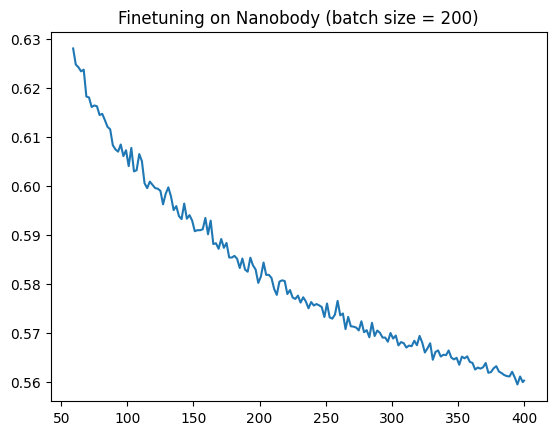

In [5]:
# steps vs validation loss 
plt.title("Finetuning on Nanobody (batch size = 200)")
plt.plot(fine_valdf['step'], fine_valdf['val_loss'])

--- 
## Random Selection

In [6]:
# get val_loss and epoch dataframes for finetune 
epochdfs, valdfs = [], []
for b in range(6):
    epochdf = pd.read_csv(f"model_logs/random_selection/random_selection_with_nanobody_ab_batches={b}_v1.csv")
    valdf = pd.read_csv(f"model_logs/random_selection/random_selection_with_nanobody_ab_batches={b}_v1 (2).csv")
    epochdfs.append(epochdf)
    valdfs.append(valdf)

epochdfs[0].head(2), valdfs[0].head(2)

(      Wall time  Step  Value
 0  1.719261e+09     0    0.0
 1  1.719261e+09     1    1.0,
       Wall time  Step     Value
 0  1.719262e+09     4  0.798926
 1  1.719263e+09     9  0.790155)

In [7]:
# get the total wall time 
for i, df in enumerate(epochdfs):
    timedeltas = pd.to_timedelta(df["Wall time"], unit='s')
    print(f"batch#{i} took ", timedeltas.iloc[-1] - timedeltas.iloc[0])
timedeltas_0 = pd.to_timedelta(epochdfs[0]["Wall time"], unit='s').iloc[0]
timedeltas_1 = pd.to_timedelta(epochdfs[-1]["Wall time"], unit='s').iloc[-1]
print("Total time delta: ", timedeltas_1 - timedeltas_0)

batch#0 took  0 days 13:16:49.129179716
batch#1 took  0 days 10:30:01.399540663
batch#2 took  0 days 22:20:03.064713478
batch#3 took  0 days 02:54:47.210827828
batch#4 took  1 days 08:11:58.336811543
batch#5 took  0 days 18:43:40.646706105
Total time delta:  4 days 05:04:28.930279494


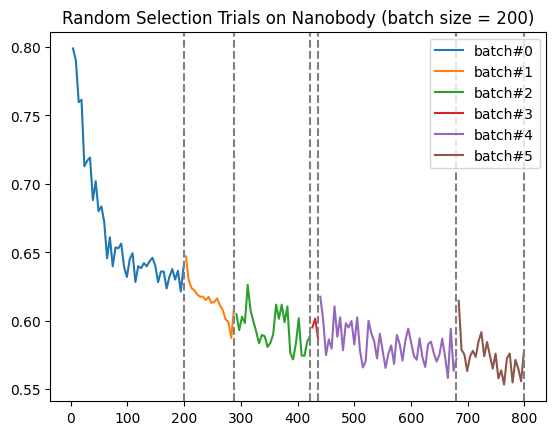

In [8]:
# plot multiple plots 
vallosses = {i: (df['Step'], df['Value']) for i, df in enumerate(valdfs)}
figure = plt.figure()
plt.title("Random Selection Trials on Nanobody (batch size = 200)")
step_acc = 0
for i, (steps, valloss) in vallosses.items():
    plt.plot(steps+step_acc, valloss, label=f"batch#{i}")
    step_acc += steps.iloc[-1]
    plt.axvline(x=step_acc, color = 'grey', ls='dashed')
plt.legend()
plt.show()

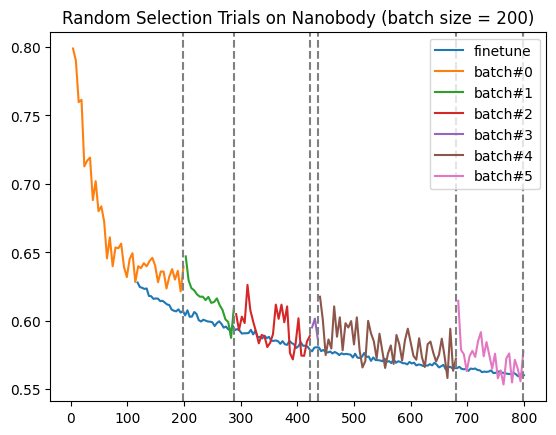

In [9]:
# overlay random selection on top of finetune val loss
# plot multiple plots 
vallosses = {i: (df['Step'], df['Value']) for i, df in enumerate(valdfs)}
figure = plt.figure()
plt.title("Random Selection Trials on Nanobody (batch size = 200)")
plt.plot(fine_valdf['step']*2, fine_valdf['val_loss'], label="finetune")
step_acc = 0
for i, (steps, valloss) in vallosses.items():
    plt.plot(steps+step_acc, valloss, label=f"batch#{i}")
    step_acc += steps.iloc[-1]
    plt.axvline(x=step_acc, color = 'grey', ls='dashed')
plt.legend()
plt.show()

--- 
## DEWDROP 

In [10]:
# get val_loss and epoch dataframes for finetune 
dfs = [pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=350_batches=0/v2/metrics.csv"), 
      pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=350_batches=1/v2/metrics.csv"), 
      pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=350_batches=2/v2/metrics.csv"), 
      pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=350_batches=3/v2/metrics.csv")]
for i in range(len(dfs)): 
    dfs[i] = dfs[i].drop(dfs[i][pd.isna(dfs[i].val_loss)].index)

# dfs[0].head(2), dfs[1].head(2)

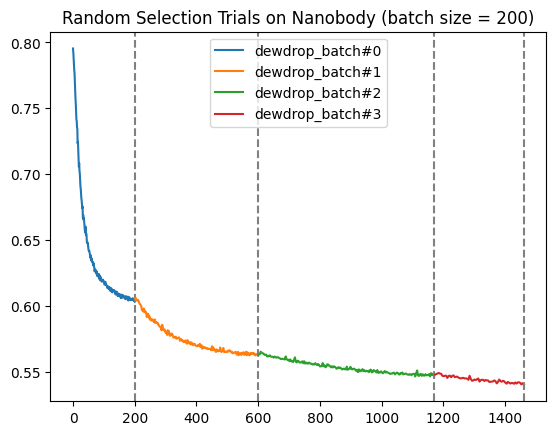

In [11]:
# plot one plot 
vallosses = {i: (df['Step'], df['Value']) for i, df in enumerate(valdfs)}
figure = plt.figure()
plt.title("Random Selection Trials on Nanobody (batch size = 200)")
step_acc, step_acc_dewdrop = 0, 0
# dewdrop
for i, df in enumerate(dfs): 
    plt.plot(df["step"]+step_acc_dewdrop, df["val_loss"], label=f"dewdrop_batch#{i}")
    step_acc_dewdrop += df["step"].iloc[-1]
    plt.axvline(x=step_acc_dewdrop, color = 'grey', ls='dashed')
plt.legend()
# plt.savefig("dewdrop_partial.png")
plt.show()

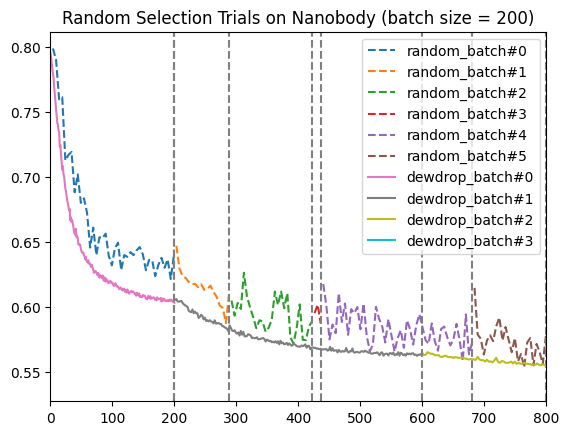

In [12]:
# plot multiple plots 
vallosses = {i: (df['Step'], df['Value']) for i, df in enumerate(valdfs)}
figure = plt.figure()
plt.xlim(0, 800)
plt.title("Random Selection Trials on Nanobody (batch size = 200)")
step_acc, step_acc_dewdrop = 0, 0
# random selectoin
for i, (steps, valloss) in vallosses.items():
    plt.plot(steps+step_acc, valloss, label=f"random_batch#{i}", ls='dashed')
    step_acc += steps.iloc[-1]
    plt.axvline(x=step_acc, color = 'grey', ls='dashed')
# dewdrop
for i, df in enumerate(dfs): 
    plt.plot(df["step"]+step_acc_dewdrop, df["val_loss"], label=f"dewdrop_batch#{i}")
    step_acc_dewdrop += df["step"].iloc[-1]
    plt.axvline(x=step_acc_dewdrop, color = 'grey', ls='dashed')
plt.legend()
plt.savefig("dewdrop_partial.png")

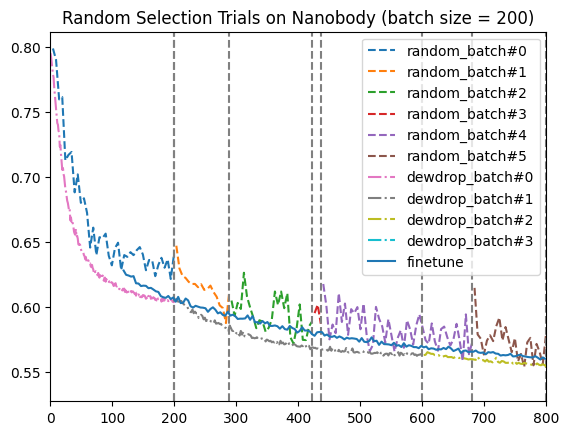

In [13]:
# plot multiple plots 
vallosses = {i: (df['Step'], df['Value']) for i, df in enumerate(valdfs)}
figure = plt.figure()
plt.xlim(0, 800)
plt.title("Random Selection Trials on Nanobody (batch size = 200)")
step_acc, step_acc_dewdrop = 0, 0
# random selectoin
for i, (steps, valloss) in vallosses.items():
    plt.plot(steps+step_acc, valloss, label=f"random_batch#{i}", ls='dashed')
    step_acc += steps.iloc[-1]
    plt.axvline(x=step_acc, color = 'grey', ls='dashed')
# dewdrop
for i, df in enumerate(dfs): 
    plt.plot(df["step"]+step_acc_dewdrop, df["val_loss"], label=f"dewdrop_batch#{i}", ls='-.')
    step_acc_dewdrop += df["step"].iloc[-1]
    plt.axvline(x=step_acc_dewdrop, color = 'grey', ls='dashed')
    
plt.plot(fine_valdf['step']*2, fine_valdf['val_loss'], label="finetune", ls='solid')
plt.legend()
plt.savefig("dewdrop_partial.png")

In [28]:
# get val_loss and epoch dataframes for finetune 
dfs_100 = [
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=100_batches=0/v2/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=100_batches=1/v2/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=100_batches=2/v2/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=100_batches=3/v2/metrics.csv"),
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=100_batches=4/v2/metrics.csv"),
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=100_batches=5/v2/metrics.csv")
]
for i in range(len(dfs_100)): 
    dfs_100[i] = dfs_100[i].drop(dfs_100[i][pd.isna(dfs_100[i].val_loss)].index)

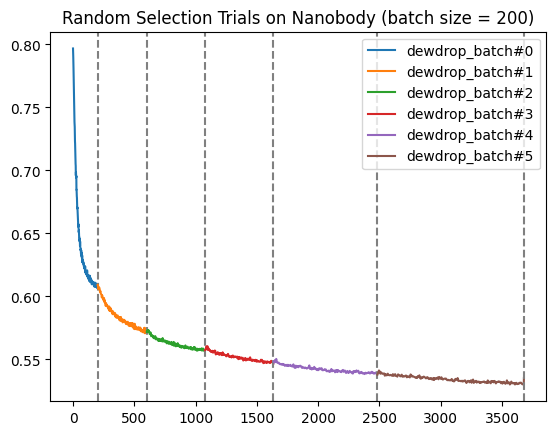

In [29]:
# plot one plot 
vallosses = {i: (df['Step'], df['Value']) for i, df in enumerate(valdfs)}
figure = plt.figure()
plt.title("Random Selection Trials on Nanobody (batch size = 200)")
step_acc, step_acc_dewdrop = 0, 0
# dewdrop
for i, df in enumerate(dfs_100): 
    plt.plot(df["step"]+step_acc_dewdrop, df["val_loss"], label=f"dewdrop_batch#{i}")
    step_acc_dewdrop += df["step"].iloc[-1]
    plt.axvline(x=step_acc_dewdrop, color = 'grey', ls='dashed')
plt.legend()
# plt.savefig("dewdrop_partial.png")
plt.show()

In [30]:
# get val_loss and epoch dataframes for finetune 
dfs_200 = [
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=0/v2/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=1/v2/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=2/v2/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=3/v2/metrics.csv"),
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=4/v2/metrics.csv"),
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=5/v2/metrics.csv")
]
for i in range(len(dfs_200)): 
    dfs_200[i] = dfs_200[i].drop(dfs_200[i][pd.isna(dfs_200[i].val_loss)].index)

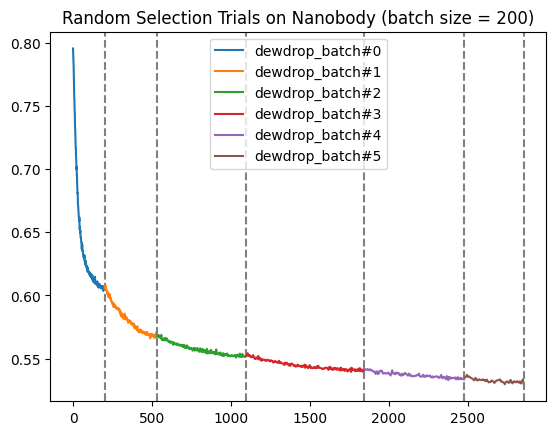

In [31]:
# plot one plot 
vallosses = {i: (df['Step'], df['Value']) for i, df in enumerate(valdfs)}
figure = plt.figure()
plt.title("Random Selection Trials on Nanobody (batch size = 200)")
step_acc, step_acc_dewdrop = 0, 0
# dewdrop
for i, df in enumerate(dfs_200): 
    plt.plot(df["step"]+step_acc_dewdrop, df["val_loss"], label=f"dewdrop_batch#{i}")
    step_acc_dewdrop += df["step"].iloc[-1]
    plt.axvline(x=step_acc_dewdrop, color = 'grey', ls='dashed')
plt.legend()
# plt.savefig("dewdrop_partial.png")
plt.show()

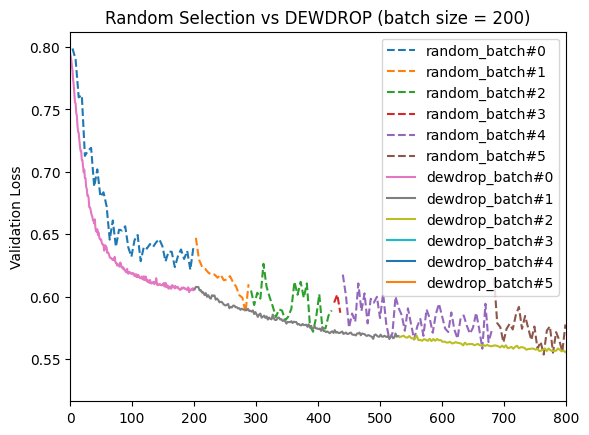

In [38]:
# plot multiple plots 
vallosses = {i: (df['Step'], df['Value']) for i, df in enumerate(valdfs)}
figure = plt.figure()
plt.xlim(0, 800)
plt.title("Random Selection vs DEWDROP (batch size = 200)")
plt.ylabel("Validation Loss")
# plt.xlabel("Batch #")
step_acc, step_acc_dewdrop = 0, 0
# random selectoin
for i, (steps, valloss) in vallosses.items():
    plt.plot(steps+step_acc, valloss, label=f"random_batch#{i}", ls='dashed')
    step_acc += steps.iloc[-1]
#     plt.axvline(x=step_acc, color = 'grey', ls='dashed')
# dewdrop
for i, df in enumerate(dfs_200): 
    plt.plot(df["step"]+step_acc_dewdrop, df["val_loss"], label=f"dewdrop_batch#{i}")
    step_acc_dewdrop += df["step"].iloc[-1]
#     plt.axvline(x=step_acc_dewdrop, color = 'grey', ls='dashed')
plt.legend()
plt.savefig("dewdrop_partial_bs=200.png")

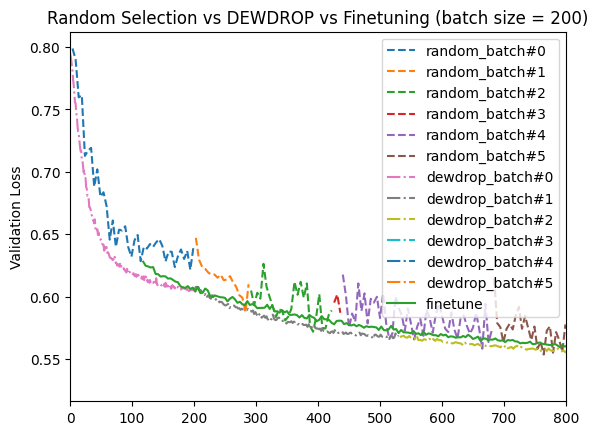

In [36]:
# plot multiple plots 
vallosses = {i: (df['Step'], df['Value']) for i, df in enumerate(valdfs)}
figure = plt.figure()
plt.xlim(0, 800)
plt.title("Random Selection vs DEWDROP vs Finetuning (batch size = 200)")
plt.ylabel("Validation Loss")
step_acc, step_acc_dewdrop = 0, 0
# random selectoin
for i, (steps, valloss) in vallosses.items():
    plt.plot(steps+step_acc, valloss, label=f"random_batch#{i}", ls='dashed')
    step_acc += steps.iloc[-1]
#     plt.axvline(x=step_acc, color = 'grey', ls='dashed')
# dewdrop
for i, df in enumerate(dfs_200): 
    plt.plot(df["step"]+step_acc_dewdrop, df["val_loss"], label=f"dewdrop_batch#{i}", ls='-.')
    step_acc_dewdrop += df["step"].iloc[-1]
#     plt.axvline(x=step_acc_dewdrop, color = 'grey', ls='dashed')
    
plt.plot(fine_valdf['step']*2, fine_valdf['val_loss'], label="finetune", ls='solid')
plt.legend()
plt.savefig("dewdrop_partial_200_finetune.png")

## Random Baseline vs DEWDROP converged val loss

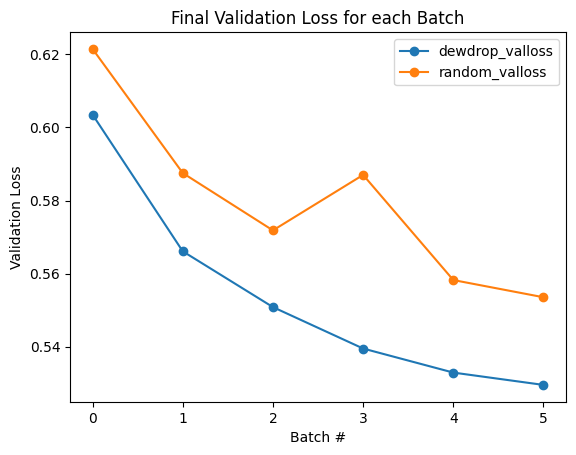

In [37]:
# get the final validation loss of after each batch 
random_valloss = [min(valloss) for i, (_, valloss) in vallosses.items()]
dewdrop_valloss = [min(df['val_loss']) for df in dfs_200]
plt.figure()
plt.title("Final Validation Loss for each Batch")
plt.ylabel("Validation Loss")
plt.xlabel("Batch #")
plt.plot(range(len(dewdrop_valloss)), dewdrop_valloss, label="dewdrop_valloss", marker="o")
plt.plot(range(len(random_valloss)), random_valloss, label="random_valloss", marker='o')
plt.legend()
plt.savefig("random_vs_dewdrop_valloss_200.png")

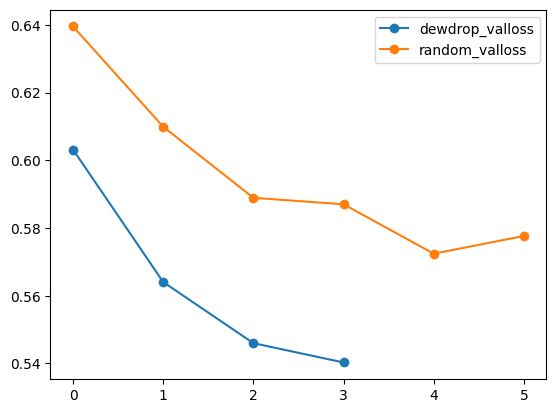

In [23]:
# get the final validation loss of after each batch 
random_valloss = [valloss.iloc[-1] for i, (_, valloss) in vallosses.items()]
dewdrop_valloss = [df['val_loss'].iloc[-1] for df in dfs]
plt.figure()
plt.plot(range(len(dewdrop_valloss)), dewdrop_valloss, label="dewdrop_valloss", marker="o")
plt.plot(range(len(random_valloss)), random_valloss, label="random_valloss", marker='o')
plt.legend()
plt.savefig("random_vs_dewdrop_valloss_350.png")

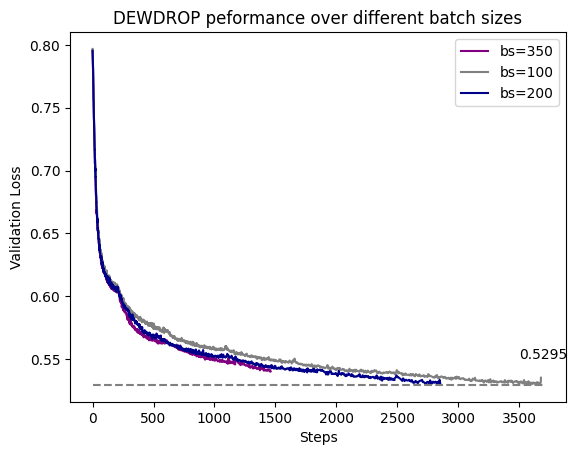

In [52]:
# compare across different batch sizes
# plot one plot 
vallosses = {i: (df['Step'], df['Value']) for i, df in enumerate(valdfs)}
figure = plt.figure()
plt.title("DEWDROP peformance over different batch sizes")
plt.ylabel("Validation Loss")
plt.xlabel("Steps")
step_acc_dewdrop, step_acc_dewdrop_100, step_acc_dewdrop_200, min_valloss = 0, 0, 0, float('inf')
# dewdrop
for i, df in enumerate(dfs): 
    if i == 0:
        plt.plot(df["step"]+step_acc_dewdrop, df["val_loss"], label=f"bs=350", c='purple')
    else:
        plt.plot(df["step"]+step_acc_dewdrop, df["val_loss"], c='purple')
    if min_valloss > min(df['val_loss']): 
        min_valloss = min(df['val_loss'])
    step_acc_dewdrop += df["step"].iloc[-1]
for i, df in enumerate(dfs_100): 
    if i == 0: 
        plt.plot(df["step"]+step_acc_dewdrop_100, df["val_loss"], label=f"bs=100", c='grey')
    else: 
        plt.plot(df["step"]+step_acc_dewdrop_100, df["val_loss"], c='grey')
    if min_valloss > min(df['val_loss']): 
        min_valloss = min(df['val_loss'])
    step_acc_dewdrop_100 += df["step"].iloc[-1]
for i, df in enumerate(dfs_200): 
    if i == 0: 
        plt.plot(df["step"]+step_acc_dewdrop_200, df["val_loss"], label=f"bs=200", c='darkblue')
    else: 
        plt.plot(df["step"]+step_acc_dewdrop_200, df["val_loss"], c='darkblue')
    if min_valloss > min(df['val_loss']): 
        min_valloss = min(df['val_loss'])
    step_acc_dewdrop_200 += df["step"].iloc[-1]

# plot out where the minimum validation loss is 
plt.hlines(min_valloss, 0, 3700, color = 'grey', ls='dashed')
plt.text(3500, 0.55, f"{round(min_valloss, 4)}")

plt.legend()
plt.savefig("dewdrop_batches.png")


## Random Initializtion vs DEWDROP

In [4]:
# # get val_loss and epoch dataframes for finetune 
# random_dfs_200 = [pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_random_init_batches=0/v1/metrics.csv"), 
#       pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_random_init_batches=1/v1/metrics.csv"), 
#       pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_random_init_batches=2/v1/metrics.csv")]
# for i in range(len(random_dfs_200)): 
#     random_dfs_200[i] = random_dfs_200[i].drop(random_dfs_200[i][pd.isna(random_dfs_200[i].val_loss)].index)

NameError: name 'random_dfs_200' is not defined

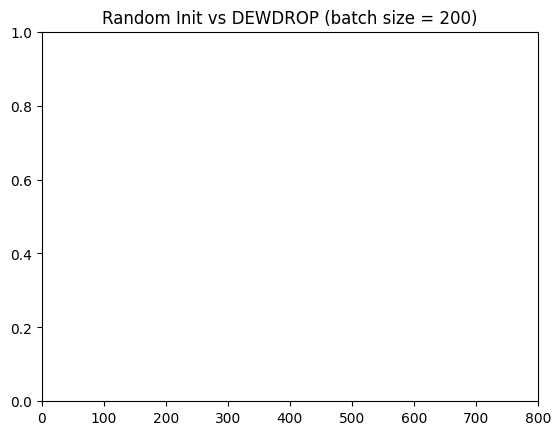

In [27]:
# plot multiple plots 
vallosses = {i: (df['Step'], df['Value']) for i, df in enumerate(valdfs)}
figure = plt.figure()
plt.xlim(0, 800)
plt.title("Random Init vs DEWDROP (batch size = 200)")
step_acc, step_acc_dewdrop = 0, 0
# random selectoin
for i, df in enumerate(random_dfs_200): 
    plt.plot(df["step"]+step_acc, df["val_loss"], label=f"dewdrop_batch#{i}", ls='dashed')
    step_acc += df["step"].iloc[-1]
#     plt.axvline(x=step_acc_dewdrop, color = 'grey', ls='dashed')
# dewdrop
for i, df in enumerate(dfs_200): 
    plt.plot(df["step"]+step_acc_dewdrop, df["val_loss"], label=f"dewdrop_batch#{i}")
    step_acc_dewdrop += df["step"].iloc[-1]
#     plt.axvline(x=step_acc_dewdrop, color = 'grey', ls='dashed')
plt.legend()
plt.savefig("dewdrop_partial_bs=200_random_init.png")

## BADGE

In [60]:
# get val_loss and epoch dataframes for finetune 
dfs_badge = [
    pd.read_csv(f"model_logs/badge/badge_bs=200_batches=0/v1/metrics.csv"), 
]
for i in range(len(dfs_badge)): 
    dfs_badge[i] = dfs_badge[i].drop(dfs_badge[i][pd.isna(dfs_badge[i].val_loss)].index)

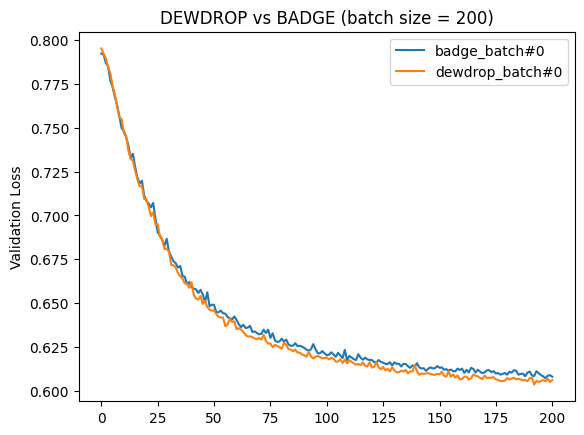

In [64]:
# plot one plot 
vallosses = {i: (df['Step'], df['Value']) for i, df in enumerate(valdfs)}
figure = plt.figure()
plt.title("DEWDROP vs BADGE (batch size = 200)")
plt.ylabel("Validation Loss")
step_acc, step_acc_dewdrop = 0, 0
# dewdrop
for i, df in enumerate(dfs_badge): 
    plt.plot(df["step"]+step_acc, df["val_loss"], label=f"badge_batch#{i}")
    step_acc += df["step"].iloc[-1]
#     plt.axvline(x=step_acc_dewdrop, color = 'grey', ls='dashed')
for i, df in enumerate(dfs_200): 
    plt.plot(df["step"]+step_acc_dewdrop, df["val_loss"], label=f"dewdrop_batch#{i}")
    step_acc_dewdrop += df["step"].iloc[-1]
    break
# # random selectoin
df_random = pd.read_csv()
# for i, (steps, valloss) in vallosses.items():
#     plt.plot(steps+step_acc, valloss, label=f"random_batch#{i}", ls='dashed')
#     step_acc += steps.iloc[-1]
#     break
plt.legend()
plt.savefig("dewdrop_badge.png")

## Collection of plots

In [42]:
# new Random vs DEWDROP 
import pandas as pd
randomdfs_v4 = [
    pd.read_csv(f"/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=0/v4/metrics.csv"), 
    pd.read_csv(f"/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=1/v4/metrics.csv"), 
    pd.read_csv(f"/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=2/v4/metrics.csv"), 
    pd.read_csv(f"/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=3/v4/metrics.csv"), 
    pd.read_csv(f"/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=4/v4/metrics.csv"), 
    pd.read_csv(f"/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=5/v4/metrics.csv"), 
]

# randomdfs_v2 = [
#     pd.read_csv(f"model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=0/v2/val_loss.csv"), 
#     pd.read_csv(f"model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=1/v2/val_loss.csv"),
#     pd.read_csv(f"model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=2/v2/val_loss.csv"),
# ]

random_vallosses = []
for i in range(6): 
#     if i < len(randomdfs_v2): 
#         # avg best val loss from the two trials 
#         avg_val_loss = (min(randomdfs_v2[i]['value']) + min(randomdfs_v3[i]['value'])) / 2
#         random_vallosses.append(avg_val_loss)
#     else: 
    random_vallosses.append(min(randomdfs_v4[i]['val_loss'])) 

In [43]:
print(len(random_vallosses))
print()
print(random_vallosses)

6

[0.6036427271184983, 0.569636469345675, 0.5518189873417533, 0.5408547608005861, nan, nan]


In [44]:
dewdropdfs_v2 = [
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=0/v2/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=1/v2/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=2/v2/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=3/v2/metrics.csv"),
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=4/v2/metrics.csv"),
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=5/v2/metrics.csv"),
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=6/v2/metrics.csv")
]
dewdropdfs_v3 = [
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=0/v3/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=1/v3/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=2/v3/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=3/v3/metrics.csv"),
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=4/v3/metrics.csv"),
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=5/v3/metrics.csv"),
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=6/v3/metrics.csv")
]

dewdropdfs_v4 = [
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=0/v4/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=1/v4/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=2/v4/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=3/v4/metrics.csv"),
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=4/v4/metrics.csv"),
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=5/v3/metrics.csv"),
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=6/v3/metrics.csv")
]

dewdropdfs_v5 = [
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=0/v5/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=1/v5/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=2/v5/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=3/v5/metrics.csv"),
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=4/v4/metrics.csv"),
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=5/v3/metrics.csv"),
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=6/v3/metrics.csv")
]

dewdropdfs_v6 = [
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=0/v6/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=1/v6/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=2/v6/metrics.csv"), 
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=3/v6/metrics.csv"),
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=4/v4/metrics.csv"),
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=5/v3/metrics.csv"),
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=6/v3/metrics.csv")
]

dewdropdfs_v7 = [
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=0/v7/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=1/v7/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=2/v7/metrics.csv"), 
    pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=3/v7/metrics.csv"),
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=4/v4/metrics.csv"),
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=5/v3/metrics.csv"),
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=6/v3/metrics.csv")
]

dewdrop_vallosses = []
for i in range(7): 
    if i < 3: 
        dewdrop_vallosses.append(np.mean([min(dewdropdfs_v2[i]['val_loss'].dropna()), min(dewdropdfs_v3[i]['val_loss'].dropna()), min(dewdropdfs_v4[i]['val_loss'].dropna()), min(dewdropdfs_v5[i]['val_loss'].dropna()), min(dewdropdfs_v6[i]['val_loss'].dropna()), min(dewdropdfs_v7[i]['val_loss'].dropna())]))
    elif i == 3: 
        dewdrop_vallosses.append(np.mean([min(dewdropdfs_v2[i]['val_loss'].dropna()),  min(dewdropdfs_v3[i]['val_loss'].dropna()),  min(dewdropdfs_v4[i]['val_loss'].dropna()),  min(dewdropdfs_v5[i]['val_loss'].dropna()),  min(dewdropdfs_v7[i]['val_loss'].dropna())]))
    elif i < 5: 
        dewdrop_vallosses.append((min(dewdropdfs_v2[i]['val_loss'].dropna()) + min(dewdropdfs_v3[i]['val_loss'].dropna()) + min(dewdropdfs_v4[i]['val_loss'].dropna())) / 3)
    else: 
        dewdrop_vallosses.append((min(dewdropdfs_v2[i]['val_loss'].dropna()) + min(dewdropdfs_v3[i]['val_loss'].dropna())) / 2)
#     dewdrop_vallosses.append(min(dewdropdfs_v2[i]['val_loss'].dropna()))
print(len(dewdrop_vallosses))
print(dewdrop_vallosses)

7
[0.6047542266185538, 0.566858473325423, 0.5516815092161343, 0.5429394522056897, 0.533727869638097, 0.5296493410340841, 0.5237725533808844]


In [45]:
badgedfs_v2 = [
    pd.read_csv(f"model_logs/badge/badge_bs=200_batches=0/v2/metrics.csv"), 
    pd.read_csv(f"model_logs/badge/badge_bs=200_batches=1/v2/metrics.csv"), 
    pd.read_csv(f"model_logs/badge/badge_bs=200_batches=2/v2/metrics.csv"), 
    pd.read_csv(f"model_logs/badge/badge_bs=200_batches=3/v2/metrics.csv"),
    pd.read_csv(f"model_logs/badge/badge_bs=200_batches=4/v2/metrics.csv"),
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=5/v2/metrics.csv"),
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=6/v2/metrics.csv")
]
badgedfs_v3 = [
    pd.read_csv(f"model_logs/badge/badge_bs=200_batches=0/v3/metrics.csv"), 
    pd.read_csv(f"model_logs/badge/badge_bs=200_batches=1/v3/metrics.csv"), 
#     pd.read_csv(f"model_logs/badge/badge_bs=200_batches=2/v2/metrics.csv"), 
#     pd.read_csv(f"model_logs/badge/badge_bs=200_batches=3/v2/metrics.csv"),
#     pd.read_csv(f"model_logs/badge/badge_bs=200_batches=4/v2/metrics.csv"),
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=5/v2/metrics.csv"),
#     pd.read_csv(f"model_logs/dewdrop/dewdrop_bs=200_batches=6/v2/metrics.csv")
]

badge_vallosses = []
for i in range(max(len(badgedfs_v2), len(badgedfs_v3))): 
    if i < min(len(badgedfs_v2), len(badgedfs_v3)): 
        # avg best val loss from the two trials 
        avg_val_loss = (min(badgedfs_v2[i]['val_loss'].dropna()) + min(badgedfs_v3[i]['val_loss'].dropna())) / 2
        badge_vallosses.append(avg_val_loss)
    else: 
        badge_vallosses.append(min(badgedfs_v2[i]['val_loss'].dropna())) 
print(len(badge_vallosses))
print(badge_vallosses)

5
[0.6051094681107867, 0.5675251180923632, 0.5517639278904216, 0.5401953670631191, 0.5317726188252173]


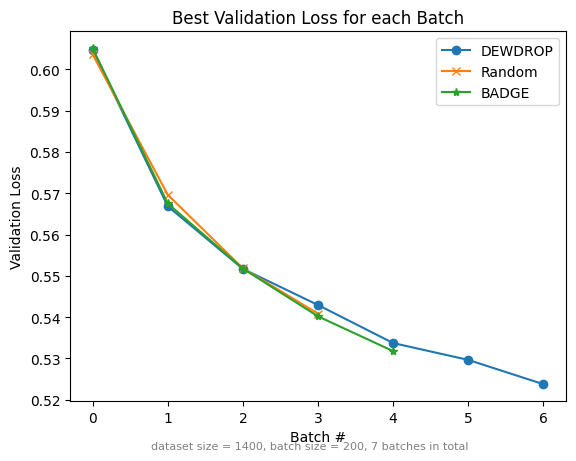

In [47]:
# DEWDROP vs BADGE vs Random 
import matplotlib.pyplot as plt
plt.figure()
plt.title("Best Validation Loss for each Batch")
plt.ylabel("Validation Loss")
plt.xlabel("Batch #")
plt.plot(range(len(dewdrop_vallosses)), dewdrop_vallosses, label="DEWDROP", marker="o")
plt.plot(range(len(random_vallosses)), random_vallosses, label="Random", marker='x')
plt.plot(range(len(badge_vallosses)), badge_vallosses, label="BADGE", marker='*')
plt.legend()
plt.figtext(0.5, 0.01, "dataset size = 1400, batch size = 200, 7 batches in total", ha="center", fontsize=8, color="gray")
plt.savefig("Best_validataion.png")

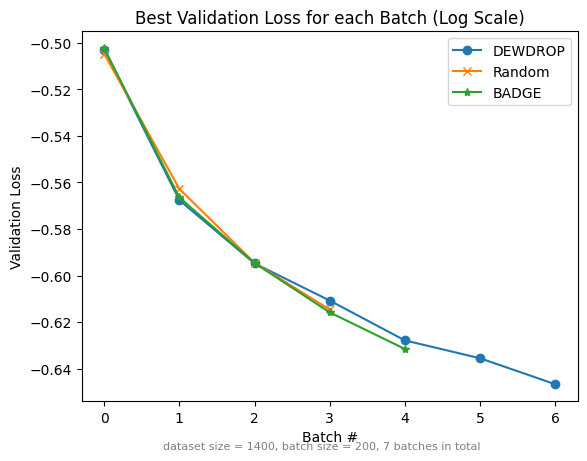

In [48]:
# DEWDROP vs BADGE vs Random 
import numpy as np
plt.figure()
plt.title("Best Validation Loss for each Batch (Log Scale)")
plt.ylabel("Validation Loss")
plt.xlabel("Batch #")
plt.plot(range(len(dewdrop_vallosses)), np.log(dewdrop_vallosses), label="DEWDROP", marker="o")
plt.plot(range(len(random_vallosses)), np.log(random_vallosses), label="Random", marker='x')
plt.plot(range(len(badge_vallosses)), np.log(badge_vallosses), label="BADGE", marker='*')
plt.legend()
plt.figtext(0.5, 0.01, "dataset size = 1400, batch size = 200, 7 batches in total", ha="center", fontsize=8, color="gray")
plt.savefig("Best_validataion_log.png")

In [53]:
# new Random vs DEWDROP 
import pandas as pd
randomdfs_v4 = [
    pd.read_csv(f"/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=0/v4/metrics.csv"), 
    pd.read_csv(f"/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=1/v4/metrics.csv"), 
    pd.read_csv(f"/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=2/v4/metrics.csv"), 
    pd.read_csv(f"/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=3/v4/metrics.csv"), 
    pd.read_csv(f"/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=4/v4/metrics.csv"), 
    pd.read_csv(f"/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=5/v4/metrics.csv"),
    pd.read_csv(f"/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=6/v4/metrics.csv"), 
]

# randomdfs_v2 = [
#     pd.read_csv(f"model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=0/v2/val_loss.csv"), 
#     pd.read_csv(f"model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=1/v2/val_loss.csv"),
#     pd.read_csv(f"model_logs/random_selection/finetune_random_selection_with_nanobody_ab_200_batches=2/v2/val_loss.csv"),
# ]

random_vallosses = []
for i in range(5): 
#     if i < len(randomdfs_v2): 
#         # avg best val loss from the two trials 
#         avg_val_loss = (min(randomdfs_v2[i]['value']) + min(randomdfs_v3[i]['value'])) / 2
#         random_vallosses.append(avg_val_loss)
#     else: 
    random_vallosses.append(min(randomdfs_v4[i]['val_loss_fape_final'])) 
    
dewdrop_vallosses = []
for i in range(5): 
    if i < 3: 
        dewdrop_vallosses.append(np.mean([min(dewdropdfs_v2[i]['val_loss_fape_final'].dropna()), min(dewdropdfs_v3[i]['val_loss_fape_final'].dropna()), min(dewdropdfs_v4[i]['val_loss_fape_final'].dropna()), min(dewdropdfs_v5[i]['val_loss_fape_final'].dropna()), min(dewdropdfs_v6[i]['val_loss_fape_final'].dropna()), min(dewdropdfs_v7[i]['val_loss_fape_final'].dropna())]))
    elif i == 3: 
        dewdrop_vallosses.append(np.mean([min(dewdropdfs_v2[i]['val_loss_fape_final'].dropna()),  min(dewdropdfs_v3[i]['val_loss_fape_final'].dropna()),  min(dewdropdfs_v4[i]['val_loss_fape_final'].dropna()),  min(dewdropdfs_v5[i]['val_loss_fape_final'].dropna()),  min(dewdropdfs_v7[i]['val_loss_fape_final'].dropna())]))
    elif i < 5: 
        dewdrop_vallosses.append((min(dewdropdfs_v2[i]['val_loss_fape_final'].dropna()) + min(dewdropdfs_v3[i]['val_loss_fape_final'].dropna()) + min(dewdropdfs_v4[i]['val_loss_fape_final'].dropna())) / 3)
    else: 
        dewdrop_vallosses.append((min(dewdropdfs_v2[i]['val_loss_fape_final'].dropna()) + min(dewdropdfs_v3[i]['val_loss_fape_final'].dropna())) / 2)
print(len(dewdrop_vallosses))
print(dewdrop_vallosses)
    
badge_vallosses = []
for i in range(max(len(badgedfs_v2), len(badgedfs_v3))): 
    if i < min(len(badgedfs_v2), len(badgedfs_v3)): 
        # avg best val loss from the two trials 
        avg_val_loss = (min(badgedfs_v2[i]['val_loss_fape_final'].dropna()) + min(badgedfs_v3[i]['val_loss_fape_final'].dropna())) / 2
        badge_vallosses.append(avg_val_loss)
    else: 
        badge_vallosses.append(min(badgedfs_v2[i]['val_loss_fape_final'].dropna())) 
print(len(badge_vallosses))
print(badge_vallosses)


5
[0.5280207693576813, 0.49808969100316364, 0.48597927888234455, 0.4775542616844176, 0.4692557652791341]
5
[0.5287758111953735, 0.4994639903306961, 0.4867975115776062, 0.475490391254425, 0.4670304358005523]


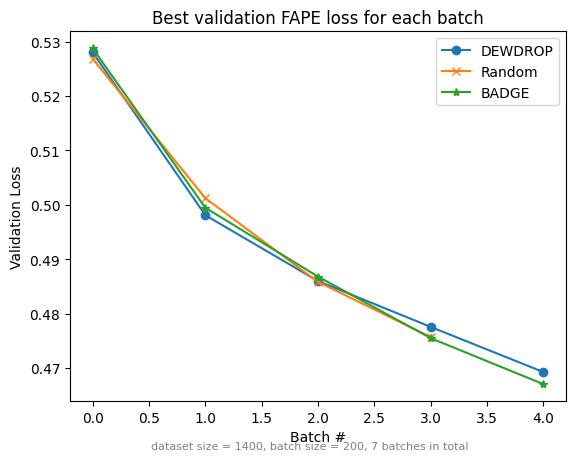

In [54]:
# DEWDROP vs BADGE vs Random 
plt.figure()
plt.title("Best validation FAPE loss for each batch")
plt.ylabel("Validation Loss")
plt.xlabel("Batch #")
plt.plot(range(len(dewdrop_vallosses)), dewdrop_vallosses, label="DEWDROP", marker="o")
plt.plot(range(len(random_vallosses)), random_vallosses, label="Random", marker='x')
plt.plot(range(len(badge_vallosses)), badge_vallosses, label="BADGE", marker='*')
plt.legend()
plt.figtext(0.5, 0.01, "dataset size = 1400, batch size = 200, 7 batches in total", ha="center", fontsize=8, color="gray")
plt.savefig("Best_validataion_FAPE.png")

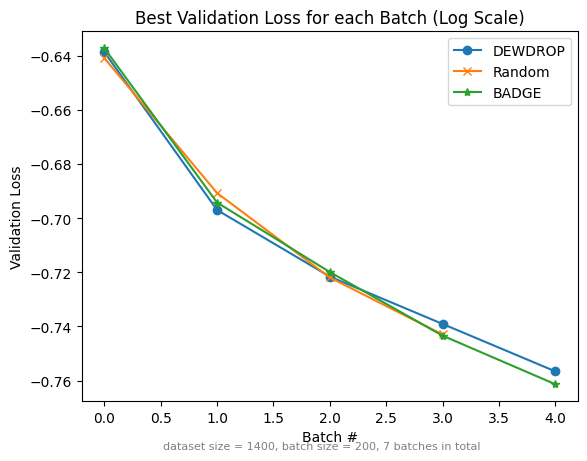

In [55]:
# DEWDROP vs BADGE vs Random 
import numpy as np
plt.figure()
plt.title("Best Validation Loss for each Batch (Log Scale)")
plt.ylabel("Validation Loss")
plt.xlabel("Batch #")
plt.plot(range(len(dewdrop_vallosses)), np.log(dewdrop_vallosses), label="DEWDROP", marker="o")
plt.plot(range(len(random_vallosses)), np.log(random_vallosses), label="Random", marker='x')
plt.plot(range(len(badge_vallosses)), np.log(badge_vallosses), label="BADGE", marker='*')
plt.legend()
plt.figtext(0.5, 0.01, "dataset size = 1400, batch size = 200, 7 batches in total", ha="center", fontsize=8, color="gray")
plt.savefig("Best_validataion_FAPE_log.png")

NameError: name 'vallosses' is not defined

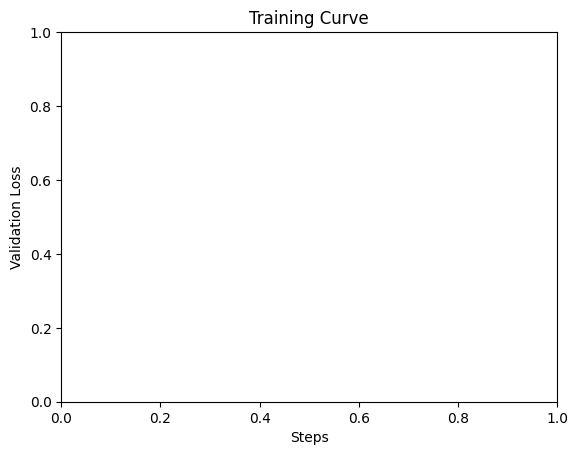

In [13]:
# plot the validataion curve 
figure = plt.figure()
# plt.xlim(0, 800)
plt.title("Training Curve")
plt.ylabel("Validation Loss")
plt.xlabel("Steps")
step_acc, step_acc_dewdrop = 0, 0
# random selectoin
for i, (steps, valloss) in vallosses.items():
    plt.plot(steps+step_acc, valloss, label=f"random_batch#{i}", ls='dashed')
    step_acc += steps.iloc[-1]
#     plt.axvline(x=step_acc, color = 'grey', ls='dashed')
# dewdrop
for i, df in enumerate(dfs_200): 
    plt.plot(df["step"]+step_acc_dewdrop, df["val_loss"], label=f"dewdrop_batch#{i}", ls='-.')
    step_acc_dewdrop += df["step"].iloc[-1]
#     plt.axvline(x=step_acc_dewdrop, color = 'grey', ls='dashed')
    
plt.plot(fine_valdf['step']*2, fine_valdf['val_loss'], label="finetune", ls='solid')
plt.legend()
plt.savefig("dewdrop_partial_200_finetune.png")

---

## DEWDROP 100 vs Random 100

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import os
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

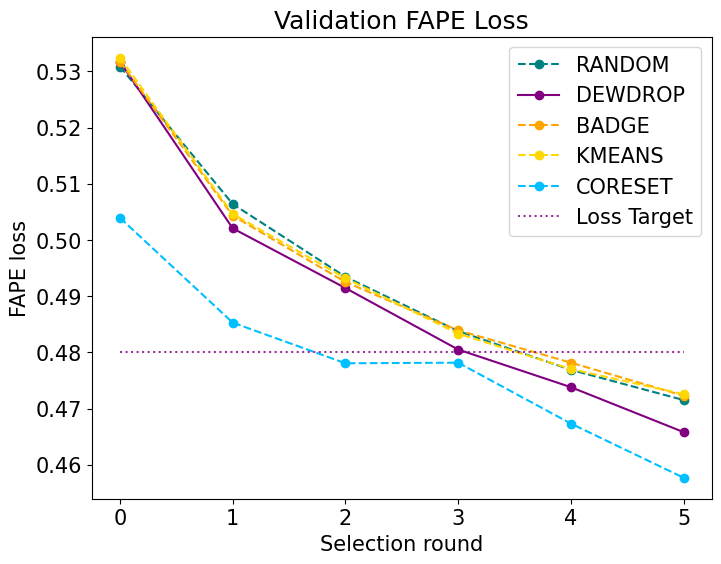

In [2]:
trial_num = 3
batch_num = 5 
batch_idx = 0
version_idx_dewdrop, version_idx_random, version_idx_badge, version_idx_kmeans, version_idx_coreset = 4, 1, 1, 1, 1
target_loss_column = 'val_loss_fape_final'
dewdropfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/dewdrop/dewdrop_bs=100_batches={batch_idx}/v{version_idx_dewdrop}/metrics.csv"
randomfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/random_selection_batches={batch_idx}/v{version_idx_random}/metrics.csv"
badgefp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/badge/badge_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"
kmeansfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/kmeans/kmeans_bs=100_batches={batch_idx}/v{version_idx_kmeans}/metrics.csv"
coresetfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/coreset/coreset_bs=100_batches={batch_idx}/v{version_idx_coreset}/metrics.csv"

dewdrop_trials, random_trials, badge_trials, kmeans_trials, coreset_trials = [], [], [], [], []
for t in range(trial_num):
    batch_idx = 0
    dewdrop_trials.append([])
    random_trials.append([])
    badge_trials.append([])
    kmeans_trials.append([])
    coreset_trials.append([])
    for b in range(batch_num+1): 
        dewdropfp = dewdropfp_template.format(batch_idx=batch_idx, version_idx_dewdrop=version_idx_dewdrop)
        randomfp = randomfp_template.format(batch_idx=batch_idx, version_idx_random=version_idx_random)
        badgefp = badgefp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        kmeansfp = kmeansfp_template.format(batch_idx=batch_idx, version_idx_kmeans=version_idx_kmeans)
        coresetfp = coresetfp_template.format(batch_idx=batch_idx, version_idx_coreset=version_idx_coreset)
        if os.path.exists(dewdropfp):
            dewdrop_trials[t].append(pd.read_csv(dewdropfp)[target_loss_column].dropna().to_list())
        if os.path.exists(randomfp): 
            random_trials[t].append(pd.read_csv(randomfp)[target_loss_column].dropna().to_list())
        if os.path.exists(badgefp): 
            badge_trials[t].append(pd.read_csv(badgefp)[target_loss_column].dropna().to_list())
        if os.path.exists(kmeansfp): 
            kmeans_trials[t].append(pd.read_csv(kmeansfp)[target_loss_column].dropna().to_list())
        if os.path.exists(coresetfp): 
            coreset_trials[t].append(pd.read_csv(coresetfp)[target_loss_column].dropna().to_list())
        batch_idx += 1
    version_idx_dewdrop += 1
    version_idx_random += 1
    version_idx_badge += 1
    version_idx_kmeans += 1
    version_idx_coreset += 1
    
# get the min valloss from each trials
dewdrop_val_fape_losses = []
random_val_fape_losses = []
badge_val_fape_losses = []
kmeans_val_fape_losses = []
coreset_val_fape_losses = []
for dewdrop_t, random_t, badge_t, kmeans_t, coreset_t in zip(dewdrop_trials, random_trials, badge_trials, kmeans_trials, coreset_trials):
    dewdrop_val_fape_losses.append([np.min(loss_b) for loss_b in dewdrop_t])
    random_val_fape_losses.append([np.min(loss_b) for loss_b in random_t])
    badge_val_fape_losses.append([np.min(loss_b) for loss_b in badge_t])
    kmeans_val_fape_losses.append([np.min(loss_b) for loss_b in kmeans_t])
    coreset_val_fape_losses.append([np.min(loss_b) for loss_b in coreset_t])

max_dewdrop_batchnum = max([len(loss) for loss in dewdrop_val_fape_losses])
dewdrop_val_fape_losses_avg = []
for b in range(max_dewdrop_batchnum): 
    dewdrop_val_fape_losses_avg.append(np.mean([dewdrop_val_fape_losses[t][b] for t in range(trial_num) if b < len(dewdrop_val_fape_losses[t])]))
max_random_batchnum = max([len(loss) for loss in random_val_fape_losses])
random_val_fape_losses_avg = []
for b in range(max_random_batchnum): 
    random_val_fape_losses_avg.append(np.mean([random_val_fape_losses[t][b] for t in range(trial_num) if b < len(random_val_fape_losses[t])]))
max_badge_batchnum = max([len(loss) for loss in badge_val_fape_losses])
badge_val_fape_losses_avg = []
for b in range(max_badge_batchnum): 
    badge_val_fape_losses_avg.append(np.mean([badge_val_fape_losses[t][b] for t in range(trial_num) if b < len(badge_val_fape_losses[t])]))
max_kmeans_batchnum = max([len(loss) for loss in kmeans_val_fape_losses])
kmeans_val_fape_losses_avg = []
for b in range(max_kmeans_batchnum): 
    kmeans_val_fape_losses_avg.append(np.mean([kmeans_val_fape_losses[t][b] for t in range(trial_num) if b < len(kmeans_val_fape_losses[t])]))
max_coreset_batchnum = max([len(loss) for loss in coreset_val_fape_losses])
coreset_val_fape_losses_avg = []
for b in range(max_coreset_batchnum): 
    coreset_val_fape_losses_avg.append(np.mean([coreset_val_fape_losses[t][b] for t in range(trial_num) if b < len(coreset_val_fape_losses[t])]))    

plt.figure(figsize=(8, 6))
plt.title("Validation FAPE Loss")
plt.xlabel("Selection round")
plt.ylabel("FAPE loss")
# plot random 
plt.plot(random_val_fape_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM')

# plot dewdrop
plt.plot(dewdrop_val_fape_losses_avg, color="purple", marker='o', label='DEWDROP')

# plot badge 
plt.plot(badge_val_fape_losses_avg, color='#FFA500', marker='o', linestyle='dashed', label='BADGE')

# plot kmeans
plt.plot(kmeans_val_fape_losses_avg, color='#FFD700', marker='o', linestyle='dashed', label='KMEANS')

# plot coreset
plt.plot(coreset_val_fape_losses_avg, color='#00BFFF', marker='o', linestyle='dashed', label='CORESET')

# plot horizontal loss threshold 
plt.hlines(y=0.48, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target")
plt.legend()
plt.savefig("graphs/compare_fape_loss.png")


In [3]:
trial_num = 3
batch_num = 5 
batch_idx = 0
version_idx_dewdrop, version_idx_random, version_idx_badge, version_idx_kmeans, version_idx_coreset = 4, 1, 1, 1, 1
target_loss_column = 'val_loss_fape_final'
dewdropfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/dewdrop/dewdrop_bs=100_batches={batch_idx}/v{version_idx_dewdrop}/metrics.csv"
randomfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/random_selection_batches={batch_idx}/v{version_idx_random}/metrics.csv"
badgefp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/badge/badge_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"
kmeansfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/kmeans/kmeans_bs=100_batches={batch_idx}/v{version_idx_kmeans}/metrics.csv"
coresetfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/coreset/coreset_bs=100_batches={batch_idx}/v{version_idx_coreset}/metrics.csv"

dewdrop_trials, random_trials, badge_trials, kmeans_trials, coreset_trials = [], [], [], [], []
for t in range(trial_num):
    batch_idx = 0
    dewdrop_trials.append([])
    random_trials.append([])
    badge_trials.append([])
    kmeans_trials.append([])
    coreset_trials.append([])
    for b in range(batch_num+1): 
        dewdropfp = dewdropfp_template.format(batch_idx=batch_idx, version_idx_dewdrop=version_idx_dewdrop)
        randomfp = randomfp_template.format(batch_idx=batch_idx, version_idx_random=version_idx_random)
        badgefp = badgefp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        kmeansfp = kmeansfp_template.format(batch_idx=batch_idx, version_idx_kmeans=version_idx_kmeans)
        coresetfp = coresetfp_template.format(batch_idx=batch_idx, version_idx_coreset=version_idx_coreset)
        if os.path.exists(dewdropfp):
            dewdrop_trials[t].append(pd.read_csv(dewdropfp)[target_loss_column].dropna().to_list())
        if os.path.exists(randomfp): 
            random_trials[t].append(pd.read_csv(randomfp)[target_loss_column].dropna().to_list())
        if os.path.exists(badgefp): 
            badge_trials[t].append(pd.read_csv(badgefp)[target_loss_column].dropna().to_list())
        if os.path.exists(kmeansfp): 
            kmeans_trials[t].append(pd.read_csv(kmeansfp)[target_loss_column].dropna().to_list())
        if os.path.exists(coresetfp): 
            coreset_trials[t].append(pd.read_csv(coresetfp)[target_loss_column].dropna().to_list())
        batch_idx += 1
    version_idx_dewdrop += 1
    version_idx_random += 1
    version_idx_badge += 1
    version_idx_kmeans += 1
    version_idx_coreset += 1
    
# get the min valloss from each trials
dewdrop_val_fape_losses = []
random_val_fape_losses = []
badge_val_fape_losses = []
kmeans_val_fape_losses = []
coreset_val_fape_losses = []
for dewdrop_t, random_t, badge_t, kmeans_t, coreset_t in zip(dewdrop_trials, random_trials, badge_trials, kmeans_trials, coreset_trials):
    dewdrop_val_fape_losses.append([np.min(loss_b) for loss_b in dewdrop_t])
    random_val_fape_losses.append([np.min(loss_b) for loss_b in random_t])
    badge_val_fape_losses.append([np.min(loss_b) for loss_b in badge_t])
    kmeans_val_fape_losses.append([np.min(loss_b) for loss_b in kmeans_t])
    coreset_val_fape_losses.append([np.min(loss_b) for loss_b in coreset_t])

print(coreset_val_fape_losses)

[[0.5296889543533325, 0.5035680532455444, 0.4887475967407226, 0.4781572222709656, 0.4673193097114563, 0.4576795399188995], [0.489548921585083, 0.4749898314476013], [0.4925864636898041, 0.4773097336292267, 0.4673601984977722]]


In [11]:
max_dewdrop_batchnum = max([len(loss) for loss in dewdrop_val_fape_losses])
dewdrop_val_fape_losses_avg = []
for b in range(max_dewdrop_batchnum): 
    dewdrop_val_fape_losses_avg.append(np.mean([dewdrop_val_fape_losses[t][b] for t in range(trial_num) if b < len(dewdrop_val_fape_losses[t])]))
dewdrop_val_fape_losses_avg

[0.5317433079083761,
 0.5020771423975626,
 0.4914439916610718,
 0.4804992079734802,
 0.4738009174664815,
 0.4658009111881256]

In [7]:
fp = "/mount/UDS-ActiveLearning-Equifold/model_logs/coreset/coreset_bs=100_batches=0/v1/metrics.csv"
np.min(pd.read_csv(fp)['val_loss_fape_final'])

0.5296889543533325

In [9]:
fp2 = "/mount/UDS-ActiveLearning-Equifold/model_logs/coreset/coreset_bs=100_batches=1/v1/metrics.csv"
np.min(pd.read_csv(fp2)['val_loss_fape_final'])

0.5035680532455444

In [15]:
trial_num = 1
batch_num = 5 
batch_idx = 0
version_idx_coreset = 1
target_loss_column = 'val_loss'
coresetfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/coreset/coreset_bs=100_batches={batch_idx}/v{version_idx_coreset}/metrics.csv"

coreset_trials = []
for t in range(trial_num):
    batch_idx = 0
    coreset_trials.append([])
    for b in range(batch_num+1): 
        coresetfp = coresetfp_template.format(batch_idx=batch_idx, version_idx_coreset=version_idx_coreset)
        if os.path.exists(coresetfp): 
            coreset_trials[t].append(pd.read_csv(coresetfp)[target_loss_column].dropna().to_list())
        batch_idx += 1
    version_idx_coreset += 1
    
# get the min valloss from each trials
coreset_val_losses = []
for coreset_t in coreset_trials:
    coreset_val_losses.append([np.min(loss_b) for loss_b in coreset_t])

max_coreset_batchnum = max([len(loss) for loss in coreset_val_losses])
coreset_val_losses_avg = []
for b in range(max_coreset_batchnum): 
    coreset_val_losses_avg.append(np.mean([coreset_val_losses[t][b] for t in range(trial_num) if b < len(coreset_val_losses[t])]))  

coreset_val_losses_avg

[0.607699979385287,
 0.5727080628081851,
 0.5547696172232152,
 0.5443861725554214,
 0.5341538367408607,
 0.5244171050035713]

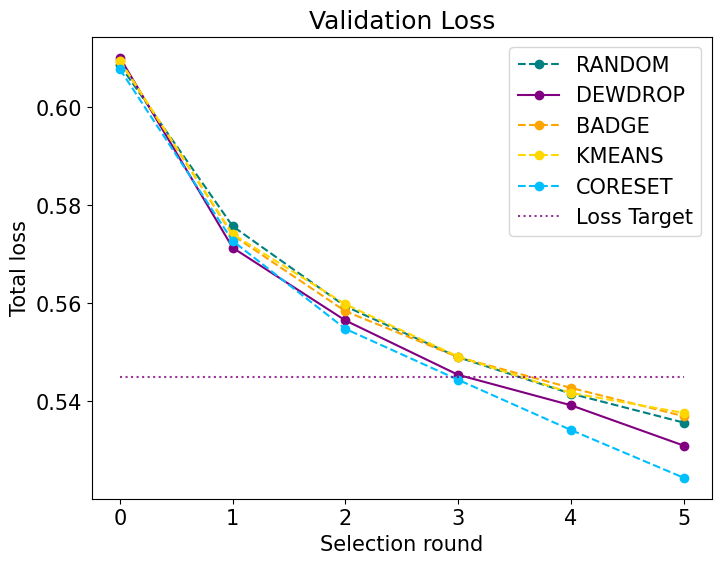

In [16]:
trial_num = 3
batch_num = 5 
batch_idx = 0
version_idx_dewdrop, version_idx_random, version_idx_badge, version_idx_kmeans = 4, 1, 1, 1
target_loss_column = 'val_loss'
dewdropfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/dewdrop/dewdrop_bs=100_batches={batch_idx}/v{version_idx_dewdrop}/metrics.csv"
randomfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/random_selection_batches={batch_idx}/v{version_idx_random}/metrics.csv"
badgefp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/badge/badge_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"
kmeansfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/kmeans/kmeans_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"

dewdrop_trials, random_trials, badge_trials, kmeans_trials = [], [], [], []
for t in range(trial_num):
    batch_idx = 0
    dewdrop_trials.append([])
    random_trials.append([])
    badge_trials.append([])
    kmeans_trials.append([])
    for b in range(batch_num+1): 
        dewdropfp = dewdropfp_template.format(batch_idx=batch_idx, version_idx_dewdrop=version_idx_dewdrop)
        randomfp = randomfp_template.format(batch_idx=batch_idx, version_idx_random=version_idx_random)
        badgefp = badgefp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        kmeansfp = kmeansfp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        if os.path.exists(dewdropfp):
            dewdrop_trials[t].append(pd.read_csv(dewdropfp)[target_loss_column].dropna().to_list())
        if os.path.exists(randomfp): 
            random_trials[t].append(pd.read_csv(randomfp)[target_loss_column].dropna().to_list())
        if os.path.exists(badgefp): 
            badge_trials[t].append(pd.read_csv(badgefp)[target_loss_column].dropna().to_list())
        if os.path.exists(kmeansfp): 
            kmeans_trials[t].append(pd.read_csv(kmeansfp)[target_loss_column].dropna().to_list())
        batch_idx += 1
    version_idx_dewdrop += 1
    version_idx_random += 1
    version_idx_badge += 1
    version_idx_kmeans += 1

# get the min valloss from each trials
dewdrop_val_losses = []
random_val_losses = []
badge_val_losses = []
kmeans_val_losses = []
for dewdrop_t, random_t, badge_t, kmeans_t in zip(dewdrop_trials, random_trials, badge_trials, kmeans_trials):
    dewdrop_val_losses.append([np.min(loss_b) for loss_b in dewdrop_t])
    random_val_losses.append([np.min(loss_b) for loss_b in random_t])
    badge_val_losses.append([np.min(loss_b) for loss_b in badge_t])
    kmeans_val_losses.append([np.min(loss_b) for loss_b in kmeans_t])

max_dewdrop_batchnum = max([len(loss) for loss in dewdrop_val_losses])
dewdrop_val_losses_avg = []
for b in range(max_dewdrop_batchnum): 
    dewdrop_val_losses_avg.append(np.mean([dewdrop_val_losses[t][b] for t in range(trial_num) if b < len(dewdrop_val_losses[t])]))
max_random_batchnum = max([len(loss) for loss in random_val_losses])
random_val_losses_avg = []
for b in range(max_random_batchnum): 
    random_val_losses_avg.append(np.mean([random_val_losses[t][b] for t in range(trial_num) if b < len(random_val_losses[t])]))
max_badge_batchnum = max([len(loss) for loss in badge_val_losses])
badge_val_losses_avg = []
for b in range(max_badge_batchnum): 
    badge_val_losses_avg.append(np.mean([badge_val_losses[t][b] for t in range(trial_num) if b < len(badge_val_losses[t])]))
kmeans_val_losses_avg = []
for b in range(max_kmeans_batchnum): 
    kmeans_val_losses_avg.append(np.mean([kmeans_val_losses[t][b] for t in range(trial_num) if b < len(kmeans_val_losses[t])]))

    
plt.figure(figsize=(8, 6))
plt.title("Validation Loss")
plt.xlabel("Selection round")
plt.ylabel("Total loss")
# plot random 
plt.plot(random_val_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM')

# plot dewdrop
plt.plot(dewdrop_val_losses_avg, color="purple", marker='o', label='DEWDROP')

# plot badge 
plt.plot(badge_val_losses_avg, color='#FFA500', marker='o', linestyle='dashed', label='BADGE')

# plot kmeans
plt.plot(kmeans_val_losses_avg, color='#FFD700', marker='o', linestyle='dashed', label='KMEANS')

# plot coreset
plt.plot(coreset_val_losses_avg, color='#00BFFF', marker='o', linestyle='dashed', label='CORESET')

# plot horizontal loss threshold 
plt.hlines(y=0.545, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target")
plt.legend()
plt.savefig("graphs/compare_loss.png")


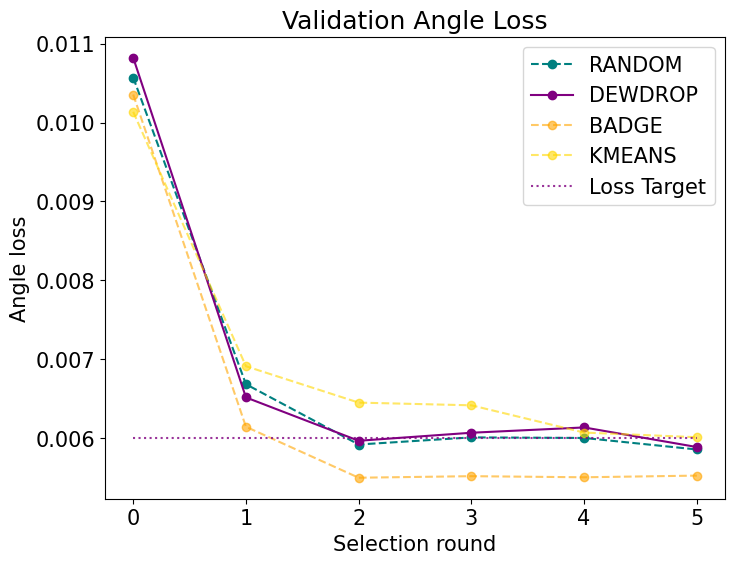

In [28]:
trial_num = 3
batch_num = 5 
batch_idx = 0
version_idx_dewdrop, version_idx_random, version_idx_badge, version_idx_kmeans = 4, 1, 1, 1
target_loss_column = 'val_loss_angle_final'
dewdropfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/dewdrop/dewdrop_bs=100_batches={batch_idx}/v{version_idx_dewdrop}/metrics.csv"
randomfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/random_selection_batches={batch_idx}/v{version_idx_random}/metrics.csv"
badgefp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/badge/badge_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"
kmeansfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/kmeans/kmeans_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"

dewdrop_trials, random_trials, badge_trials, kmeans_trials = [], [], [], []
for t in range(trial_num):
    batch_idx = 0
    dewdrop_trials.append([])
    random_trials.append([])
    badge_trials.append([])
    kmeans_trials.append([])
    for b in range(batch_num+1): 
        dewdropfp = dewdropfp_template.format(batch_idx=batch_idx, version_idx_dewdrop=version_idx_dewdrop)
        randomfp = randomfp_template.format(batch_idx=batch_idx, version_idx_random=version_idx_random)
        badgefp = badgefp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        kmeansfp = kmeansfp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        if os.path.exists(dewdropfp):
            dewdrop_trials[t].append(pd.read_csv(dewdropfp)[target_loss_column].dropna().to_list())
        if os.path.exists(randomfp): 
            random_trials[t].append(pd.read_csv(randomfp)[target_loss_column].dropna().to_list())
        if os.path.exists(badgefp): 
            badge_trials[t].append(pd.read_csv(badgefp)[target_loss_column].dropna().to_list())
        if os.path.exists(kmeansfp): 
            kmeans_trials[t].append(pd.read_csv(kmeansfp)[target_loss_column].dropna().to_list())
        batch_idx += 1
    version_idx_dewdrop += 1
    version_idx_random += 1
    version_idx_badge += 1
    version_idx_kmeans += 1

# get the min valloss from each trials
dewdrop_val_angle_losses = []
random_val_angle_losses = []
badge_val_angle_losses = []
kmeans_val_angle_losses = []
for dewdrop_t, random_t, badge_t, kmeans_t in zip(dewdrop_trials, random_trials, badge_trials, kmeans_trials):
    dewdrop_val_angle_losses.append([np.min(loss_b) for loss_b in dewdrop_t])
    random_val_angle_losses.append([np.min(loss_b) for loss_b in random_t])
    badge_val_angle_losses.append([np.min(loss_b) for loss_b in badge_t])
    kmeans_val_angle_losses.append([np.min(loss_b) for loss_b in kmeans_t])

max_dewdrop_batchnum = max([len(loss) for loss in dewdrop_val_angle_losses])
dewdrop_val_angle_losses_avg = []
for b in range(max_dewdrop_batchnum): 
    dewdrop_val_angle_losses_avg.append(np.mean([dewdrop_val_angle_losses[t][b] for t in range(trial_num) if b < len(dewdrop_val_angle_losses[t])]))
max_random_batchnum = max([len(loss) for loss in random_val_angle_losses])
random_val_angle_losses_avg = []
for b in range(max_random_batchnum): 
    random_val_angle_losses_avg.append(np.mean([random_val_angle_losses[t][b] for t in range(trial_num) if b < len(random_val_angle_losses[t])]))
max_badge_batchnum = max([len(loss) for loss in badge_val_angle_losses])
badge_val_angle_losses_avg = []
for b in range(max_badge_batchnum): 
    badge_val_angle_losses_avg.append(np.mean([badge_val_angle_losses[t][b] for t in range(trial_num) if b < len(badge_val_angle_losses[t])]))
max_kmeans_batchnum = max([len(loss) for loss in kmeans_val_angle_losses])
kmeans_val_angle_losses_avg = []
for b in range(max_kmeans_batchnum): 
    kmeans_val_angle_losses_avg.append(np.mean([kmeans_val_angle_losses[t][b] for t in range(trial_num) if b < len(kmeans_val_angle_losses[t])]))
    
plt.figure(figsize=(8, 6))
plt.title("Validation Angle Loss")
plt.xlabel("Selection round")
plt.ylabel("Angle loss")
# plot random 
plt.plot(random_val_angle_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM')

# plot dewdrop
plt.plot(dewdrop_val_angle_losses_avg, color="purple", marker='o', label='DEWDROP')

# plot badge 
plt.plot(badge_val_angle_losses_avg, color='#FFA500', alpha=0.6, marker='o', linestyle='dashed', label='BADGE')

# plot kmeans 
plt.plot(kmeans_val_angle_losses_avg, color='#FFD700', alpha=0.6, marker='o', linestyle='dashed', label='KMEANS')

# plot horizontal loss threshold 
plt.hlines(y=0.006, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target")
plt.legend()
plt.savefig("graphs/compare_angle_loss.png")


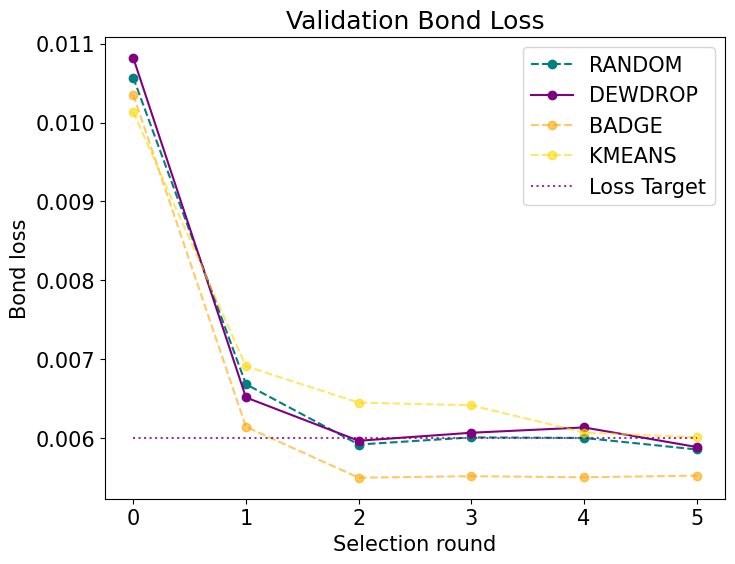

In [29]:
trial_num = 3
batch_num = 5 
batch_idx = 0
version_idx_dewdrop, version_idx_random, version_idx_badge, version_idx_kmeans = 4, 1, 1, 1
target_loss_column = 'val_loss_angle_final'
dewdropfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/dewdrop/dewdrop_bs=100_batches={batch_idx}/v{version_idx_dewdrop}/metrics.csv"
randomfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/random_selection_batches={batch_idx}/v{version_idx_random}/metrics.csv"
badgefp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/badge/badge_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"
kmeansfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/kmeans/kmeans_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"

dewdrop_trials, random_trials, badge_trials, kmeans_trials = [], [], [], []
for t in range(trial_num):
    batch_idx = 0
    dewdrop_trials.append([])
    random_trials.append([])
    badge_trials.append([])
    kmeans_trials.append([])
    for b in range(batch_num+1): 
        dewdropfp = dewdropfp_template.format(batch_idx=batch_idx, version_idx_dewdrop=version_idx_dewdrop)
        randomfp = randomfp_template.format(batch_idx=batch_idx, version_idx_random=version_idx_random)
        badgefp = badgefp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        kmeansfp = kmeansfp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        if os.path.exists(dewdropfp):
            dewdrop_trials[t].append(pd.read_csv(dewdropfp)[target_loss_column].dropna().to_list())
        if os.path.exists(randomfp): 
            random_trials[t].append(pd.read_csv(randomfp)[target_loss_column].dropna().to_list())
        if os.path.exists(badgefp): 
            badge_trials[t].append(pd.read_csv(badgefp)[target_loss_column].dropna().to_list())
        if os.path.exists(kmeansfp): 
            kmeans_trials[t].append(pd.read_csv(kmeansfp)[target_loss_column].dropna().to_list())
        batch_idx += 1
    version_idx_dewdrop += 1
    version_idx_random += 1
    version_idx_badge += 1
    version_idx_kmeans += 1

# get the min valloss from each trials
dewdrop_val_bond_losses = []
random_val_bond_losses = []
badge_val_bond_losses = []
kmeans_val_bond_losses = []
for dewdrop_t, random_t, badge_t, kmeans_t in zip(dewdrop_trials, random_trials, badge_trials, kmeans_trials):
    dewdrop_val_bond_losses.append([np.min(loss_b) for loss_b in dewdrop_t])
    random_val_bond_losses.append([np.min(loss_b) for loss_b in random_t])
    badge_val_bond_losses.append([np.min(loss_b) for loss_b in badge_t])
    kmeans_val_bond_losses.append([np.min(loss_b) for loss_b in kmeans_t])

max_dewdrop_batchnum = max([len(loss) for loss in dewdrop_val_bond_losses])
dewdrop_val_bond_losses_avg = []
for b in range(max_dewdrop_batchnum): 
    dewdrop_val_bond_losses_avg.append(np.mean([dewdrop_val_bond_losses[t][b] for t in range(trial_num) if b < len(dewdrop_val_bond_losses[t])]))
max_random_batchnum = max([len(loss) for loss in random_val_bond_losses])
random_val_bond_losses_avg = []
for b in range(max_random_batchnum): 
    random_val_bond_losses_avg.append(np.mean([random_val_bond_losses[t][b] for t in range(trial_num) if b < len(random_val_bond_losses[t])]))
max_badge_batchnum = max([len(loss) for loss in badge_val_bond_losses])
badge_val_bond_losses_avg = []
for b in range(max_badge_batchnum): 
    badge_val_bond_losses_avg.append(np.mean([badge_val_bond_losses[t][b] for t in range(trial_num) if b < len(badge_val_bond_losses[t])]))
max_kmeans_batchnum = max([len(loss) for loss in kmeans_val_bond_losses])
kmeans_val_bond_losses_avg = []
for b in range(max_kmeans_batchnum): 
    kmeans_val_bond_losses_avg.append(np.mean([kmeans_val_bond_losses[t][b] for t in range(trial_num) if b < len(kmeans_val_bond_losses[t])]))
    
plt.figure(figsize=(8, 6))
plt.title("Validation Bond Loss")
plt.xlabel("Selection round")
plt.ylabel("Bond loss")
# plot random 
plt.plot(random_val_bond_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM')

# plot dewdrop
plt.plot(dewdrop_val_bond_losses_avg, color="purple", marker='o', label='DEWDROP')

# plot badge 
plt.plot(badge_val_bond_losses_avg, color='#FFA500', alpha=0.6, marker='o', linestyle='dashed', label='BADGE')

# plot kmeans 
plt.plot(kmeans_val_bond_losses_avg, color='#FFD700', alpha=0.6, marker='o', linestyle='dashed', label='KMEANS')

# plot horizontal loss threshold 
plt.hlines(y=0.006, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target")
plt.legend()
plt.savefig("graphs/compare_bond_loss.png")


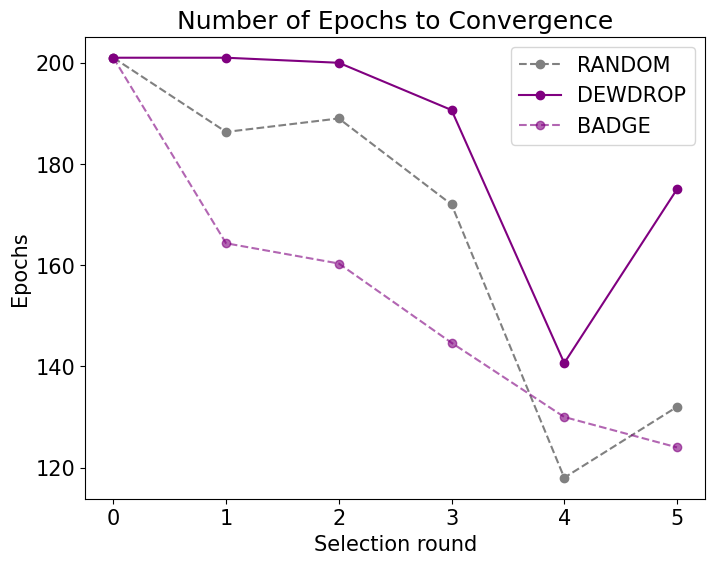

In [30]:
trial_num = 3
batch_num = 5 
batch_idx = 0
version_idx_dewdrop, version_idx_random, version_idx_badge = 4, 1, 1
target_loss_column = 'epoch'
dewdropfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/dewdrop/dewdrop_bs=100_batches={batch_idx}/v{version_idx_dewdrop}/metrics.csv"
randomfp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/random_selection/random_selection_batches={batch_idx}/v{version_idx_random}/metrics.csv"
badgefp_template = "/mount/UDS-ActiveLearning-Equifold/model_logs/badge/badge_bs=100_batches={batch_idx}/v{version_idx_badge}/metrics.csv"

dewdrop_trials, random_trials, badge_trials = [], [], []
for t in range(trial_num):
    batch_idx = 0
    dewdrop_trials.append([])
    random_trials.append([])
    badge_trials.append([])
    for b in range(batch_num+1): 
        dewdropfp = dewdropfp_template.format(batch_idx=batch_idx, version_idx_dewdrop=version_idx_dewdrop)
        randomfp = randomfp_template.format(batch_idx=batch_idx, version_idx_random=version_idx_random)
        badgefp = badgefp_template.format(batch_idx=batch_idx, version_idx_badge=version_idx_badge)
        if os.path.exists(dewdropfp):
            dewdrop_trials[t].append(pd.read_csv(dewdropfp)[target_loss_column].dropna().to_list())
        if os.path.exists(randomfp): 
            random_trials[t].append(pd.read_csv(randomfp)[target_loss_column].dropna().to_list())
        if os.path.exists(badgefp): 
            badge_trials[t].append(pd.read_csv(badgefp)[target_loss_column].dropna().to_list())
        batch_idx += 1
    version_idx_dewdrop += 1
    version_idx_random += 1
    version_idx_badge += 1
    
# get the min valloss from each trials
dewdrop_val_fape_losses = []
random_val_fape_losses = []
badge_val_fape_losses = []
for dewdrop_t, random_t, badge_t in zip(dewdrop_trials, random_trials, badge_trials):
    dewdrop_val_fape_losses.append([len(np.unique(loss_b)) for loss_b in dewdrop_t])
    random_val_fape_losses.append([len(np.unique(loss_b)) for loss_b in random_t])
    badge_val_fape_losses.append([len(np.unique(loss_b)) for loss_b in badge_t])

max_dewdrop_batchnum = max([len(loss) for loss in dewdrop_val_fape_losses])
dewdrop_val_fape_losses_avg = []
for b in range(max_dewdrop_batchnum): 
    dewdrop_val_fape_losses_avg.append(np.mean([dewdrop_val_fape_losses[t][b] for t in range(trial_num) if b < len(dewdrop_val_fape_losses[t])]))
max_random_batchnum = max([len(loss) for loss in random_val_fape_losses])
random_val_fape_losses_avg = []
for b in range(max_random_batchnum): 
    random_val_fape_losses_avg.append(np.mean([random_val_fape_losses[t][b] for t in range(trial_num) if b < len(random_val_fape_losses[t])]))
max_badge_batchnum = max([len(loss) for loss in badge_val_fape_losses])
badge_val_fape_losses_avg = []
for b in range(max_badge_batchnum): 
    badge_val_fape_losses_avg.append(np.mean([badge_val_fape_losses[t][b] for t in range(trial_num) if b < len(badge_val_fape_losses[t])]))

    
plt.figure(figsize=(8, 6))
plt.title("Number of Epochs to Convergence")
plt.xlabel("Selection round")
plt.ylabel("Epochs")
# plot random 
plt.plot(random_val_fape_losses_avg, color="grey", marker='o', linestyle='dashed', label='RANDOM')

# plot dewdrop
plt.plot(dewdrop_val_fape_losses_avg, color="purple", marker='o', label='DEWDROP')

# plot badge 
plt.plot(badge_val_fape_losses_avg, color='purple', alpha=0.6, marker='o', linestyle='dashed', label='BADGE')



plt.legend()
plt.savefig("graphs/epochs_til_convergence.png")



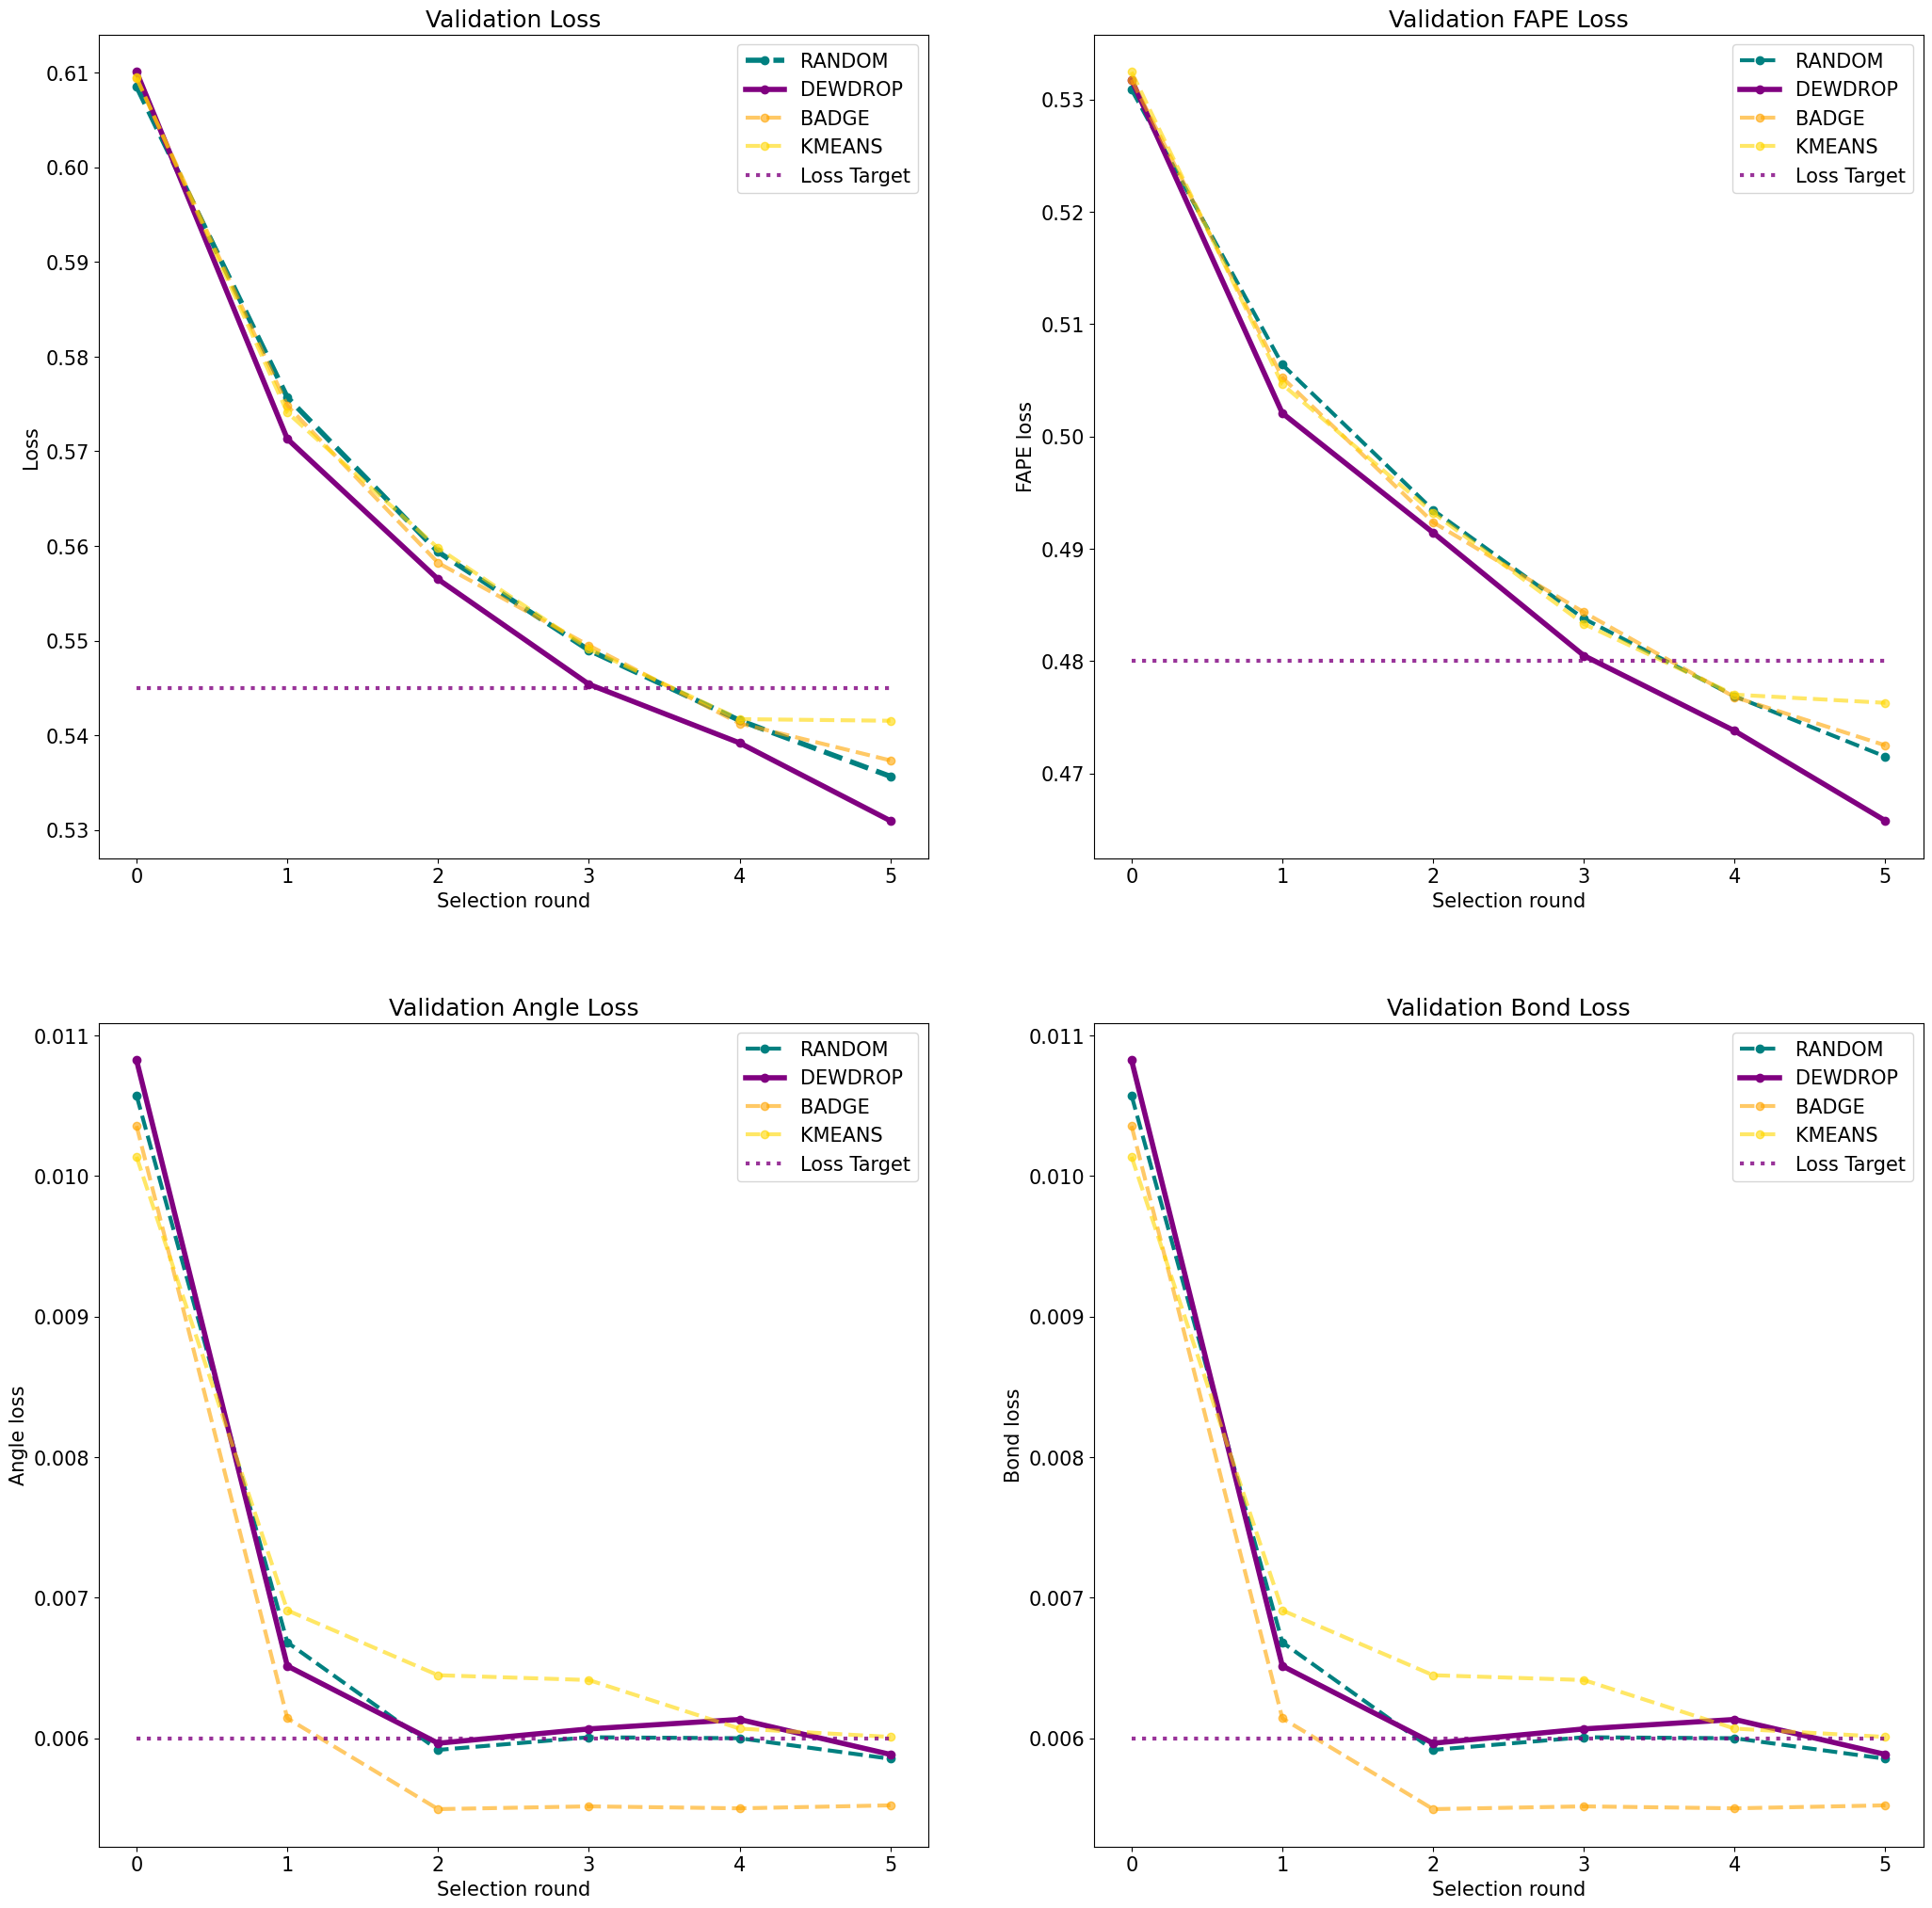

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(25, 25))
axes[0, 0].set_title("Validation Loss")
axes[0, 0].set_xlabel("Selection round")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].plot(random_val_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM', linewidth=4)
axes[0, 0].plot(dewdrop_val_losses_avg, color="purple", marker='o', label='DEWDROP', linewidth=4)
axes[0, 0].plot(badge_val_losses_avg, color='#FFA500', alpha=0.6, marker='o', linestyle='dashed', label='BADGE', linewidth=3)
axes[0, 0].plot(kmeans_val_losses_avg, color='#FFD700', alpha=0.6, marker='o', linestyle='dashed', label='KMEANS', linewidth=3)
axes[0, 0].hlines(y=0.545, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target", linewidth=3)
axes[0, 0].legend()


axes[0, 1].set_title("Validation FAPE Loss")
axes[0, 1].set_xlabel("Selection round")
axes[0, 1].set_ylabel("FAPE loss")
axes[0, 1].plot(random_val_fape_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM', linewidth=3)
axes[0, 1].plot(dewdrop_val_fape_losses_avg, color="purple", marker='o', label='DEWDROP', linewidth=4)
axes[0, 1].plot(badge_val_fape_losses_avg, color='#FFA500', alpha=0.6, marker='o', linestyle='dashed', label='BADGE', linewidth=3)
axes[0, 1].plot(kmeans_val_fape_losses_avg, color='#FFD700', alpha=0.6, marker='o', linestyle='dashed', label='KMEANS', linewidth=3)
axes[0, 1].hlines(y=0.48, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target", linewidth=3)
axes[0, 1].legend()


axes[1, 0].set_title("Validation Angle Loss")
axes[1, 0].set_xlabel("Selection round")
axes[1, 0].set_ylabel("Angle loss") 
axes[1, 0].plot(random_val_angle_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM', linewidth=3)
axes[1, 0].plot(dewdrop_val_angle_losses_avg, color="purple", marker='o', label='DEWDROP', linewidth=4)
axes[1, 0].plot(badge_val_angle_losses_avg, color='#FFA500', alpha=0.6, marker='o', linestyle='dashed', label='BADGE', linewidth=3)
axes[1, 0].plot(kmeans_val_angle_losses_avg, color='#FFD700', alpha=0.6, marker='o', linestyle='dashed', label='KMEANS', linewidth=3)
axes[1, 0].hlines(y=0.006, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target", linewidth=3)
axes[1, 0].legend()


axes[1, 1].set_title("Validation Bond Loss")
axes[1, 1].set_xlabel("Selection round")
axes[1, 1].set_ylabel("Bond loss") 
axes[1, 1].plot(random_val_bond_losses_avg, color="#008080", marker='o', linestyle='dashed', label='RANDOM', linewidth=3)
axes[1, 1].plot(dewdrop_val_bond_losses_avg, color="purple", marker='o', label='DEWDROP', linewidth=4) 
axes[1, 1].plot(badge_val_bond_losses_avg, color='#FFA500', alpha=0.6, marker='o', linestyle='dashed', label='BADGE', linewidth=3)
axes[1, 1].plot(kmeans_val_bond_losses_avg, color='#FFD700', alpha=0.6, marker='o', linestyle='dashed', label='KMEANS', linewidth=3)
axes[1, 1].hlines(y=0.006, xmin=0, xmax=5, colors='purple', alpha=0.8, linestyle='dotted', label="Loss Target", linewidth=3)
axes[1, 1].legend()

plt.savefig("graphs/4in1_compare_loss.png")